# Discovering Dynamic Patterns from Coronavirus Data using Dynamic Mode Decomposition with Control: World Data

## Import Data

In [1]:
# package imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from pydmd import DMD
from datetime import timedelta, date, datetime

In [2]:
# import time_series_covid19_confirmed_global.csv
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)

In [17]:
# import time_series_covid19_deaths_global.csv
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths = pd.read_csv(url, error_bad_lines=False)

In [18]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,Burma,21.9162,95.9560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,8,10
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,4


In [19]:
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,1,1,1,2,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,4,5,5,6,8,10,10
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,11,15,17,17,19,21,25,26,29,31
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,1,1,1,1,3,3,3,6
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,Burma,21.9162,95.9560,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


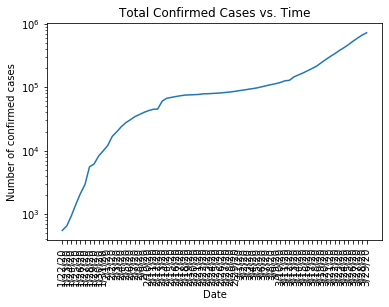

In [6]:
# plot confirmed cases vs. time
plt.title('Total Confirmed Cases vs. Time')

plt.plot(confirmed.loc[:,'1/22/20':].sum())

plt.xlabel('Date')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

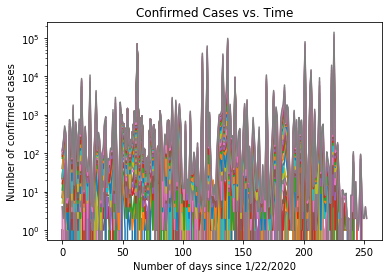

In [7]:
# plot confirmed cases vs. time
plt.title('Confirmed Cases vs. Time')

plt.plot(confirmed.loc[:,'1/22/20':])

plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Number of confirmed cases')
plt.yscale('log')

plt.show()

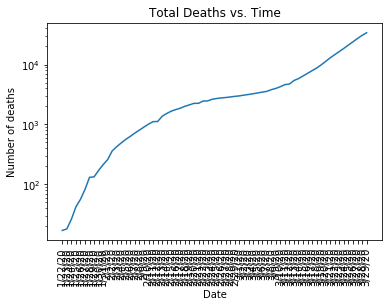

In [8]:
# plot confirmed cases vs. time
plt.title('Total Deaths vs. Time')

plt.plot(deaths.loc[:,'1/22/20':].sum())

plt.xlabel('Date')
plt.ylabel('Number of deaths')
plt.yscale('log')
plt.xticks(rotation='vertical')

plt.show()

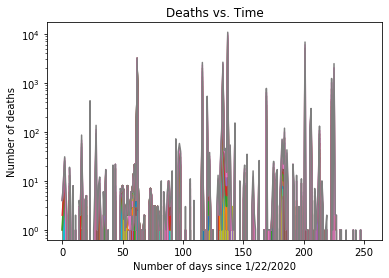

In [9]:
# plot confirmed cases vs. time
plt.title('Deaths vs. Time')

plt.plot(deaths.loc[ :,'1/22/20':])

plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Number of deaths')
plt.yscale('log')

plt.show()

## Normalize each location’s time series to account for larger population centers

subtract mean from time series and set variance to one

In [10]:
idx = pd.IndexSlice

# confirmed cases normalized
data = confirmed.loc[ :,'1/22/20':] # select all date ranges
scaledDataConfirmed = preprocessing.scale(data) # Scaled data has zero mean and unit variance
#confirmed.loc[ idx[:,'1/22/20':]] = scaledDataConfirmed

# deaths normalized
data = deaths.loc[ :,'1/22/20':] # select all date ranges
scaledDataDeaths = preprocessing.scale(data) # Scaled data has zero mean and unit variance
#deaths.loc[ idx[:,'1/22/20':]] = scaledDataDeaths

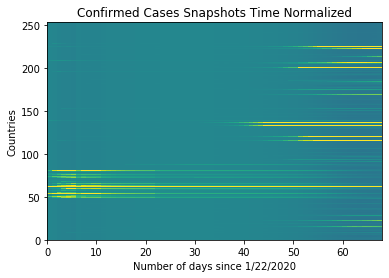

In [22]:
# plot normalized data snapshots
plt.title('Confirmed Cases Snapshots Time Normalized')
plt.pcolor(scaledDataConfirmed, vmin=-1, vmax=1)
plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Countries')
plt.show()

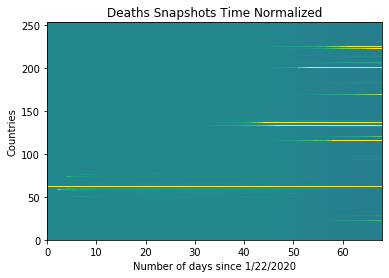

In [23]:
plt.title('Deaths Snapshots Time Normalized')

plt.pcolor(scaledDataDeaths, vmin=-1, vmax=1)
plt.xlabel('Number of days since 1/22/2020')
plt.ylabel('Countries')
plt.show()

## Take DMD

In [13]:
dmd = DMD()
dmd.fit(scaledDataConfirmed.T)


Eigenvalue (0.6193466897029791+0.11583435592897845j): distance from unit circle 0.6029920799404804
Eigenvalue (0.6193466897029791-0.11583435592897845j): distance from unit circle 0.6029920799404804
Eigenvalue (-0.5116151965468329+0.1854795747652461j): distance from unit circle 0.703847218007249
Eigenvalue (-0.5116151965468329-0.1854795747652461j): distance from unit circle 0.703847218007249
Eigenvalue (0.1684100539946108+0.49420380691955834j): distance from unit circle 0.7274006509397482
Eigenvalue (0.1684100539946108-0.49420380691955834j): distance from unit circle 0.7274006509397482
Eigenvalue (0.008338875436870452+0.32762043271968155j): distance from unit circle 0.892595315221017
Eigenvalue (0.008338875436870452-0.32762043271968155j): distance from unit circle 0.892595315221017
Eigenvalue (-0.13256337905955992+0.17452140306793262j): distance from unit circle 0.9519692304035117
Eigenvalue (-0.13256337905955992-0.17452140306793262j): distance from unit circle 0.9519692304035117
Eigenv

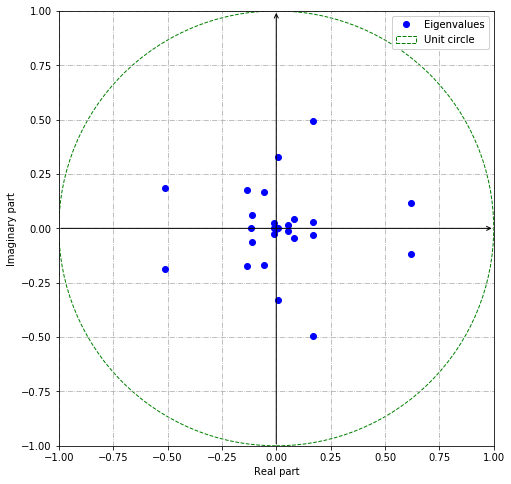

In [14]:
for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(eig.imag**2+eig.real**2 - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

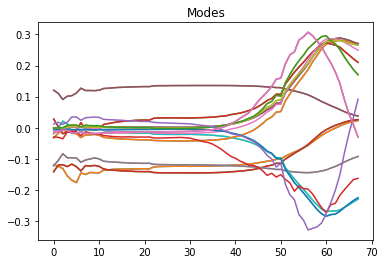

In [16]:
# modes for each date and country
for mode in dmd.modes.T:
    plt.plot(mode.real)
    plt.title('Modes')
plt.show()
